# Linear Least Squares Fun

Having fun with Linear Least Squares. Is a sentence no one has ever said ever. But its nice to remember how to do this by manually every once in a while. Solving linear least squares is just the fact of solving

$$Ax = b$$

Such that 

$$||Ax - b||^{2}$$

is minimized. In this case, $A$ is a $m \times n$ matrix, $b$ is a $n$ long matrix. The previous equation is the error along the first equation. The normal equations are a solution to minimizing the previous equation:

$$A^{T}Ax = A^{T}b$$

This is ordinary least squares and theres more information about it here: https://en.wikipedia.org/wiki/Ordinary_least_squares

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Loading the Data

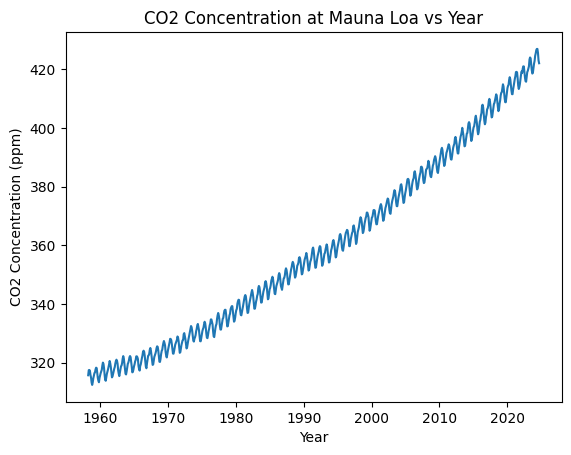

In [7]:
data = np.loadtxt("co2-data.csv", delimiter=",", dtype=str)
data = data[1:,:].astype(np.float64)

year = data[:,0]
co2 = data[:,1]

plt.plot(year, co2)
plt.xlabel("Year")
plt.ylabel("CO2 Concentration (ppm)")
plt.title("CO2 Concentration at Mauna Loa vs Year")
#plt.savefig("co2_chart.pdf")
plt.show()

## Gaussian Elimination

With Partial Pivoting

In [2]:
def gausselim(A_in, b_in):
    # Init
    N = len(A_in[0])
    A = np.copy(A_in)
    b = np.copy(b_in)
    x = np.zeros(N)
    
    # Row operations
    for m in range(N):
        # Divide by diagonal element
        a = A[m,m]
        A[m,:] /= a
        b[m]   /= a
        
        # Subtract from lower rows
        for i in range(m+1,N):
            a = A[i,m]
            A[i,:] -= a*A[m,:]
            b[i]   -= a*b[m]
            
    # Back substitution
    x[-1] = b[-1]
    for i in range(2,len(b)+1):
        prod = 1
        val = 0
        for j in range(1,i):
            val = val + (-1)*(A[-i][-j])*x[-j]
        x[-i] = b[-i] + val
    
    return x

## The Normal Equations

Fairly Straightforward. Solving

$$A^{T} A x = A^{T} b$$

In [8]:
def leastsquares(A, b):
    return gausselim(np.dot(A.T,A), np.dot(A.T,b))

## Trying it out for different equations

### Linear Fit

$$A = \begin{bmatrix}
x_{1} & 1 \\
x_{2} & 1 \\
\vdots  & \vdots \\
\end{bmatrix} \hspace{1cm} b= \begin{bmatrix}
y_{1} \\
y_{2} \\
\vdots
\end{bmatrix}$$
After solving the normal equations, you recieve 2 values, which will be $m$ and $b_{0}$ in the equation:
$$y = mx + b_{0}$$

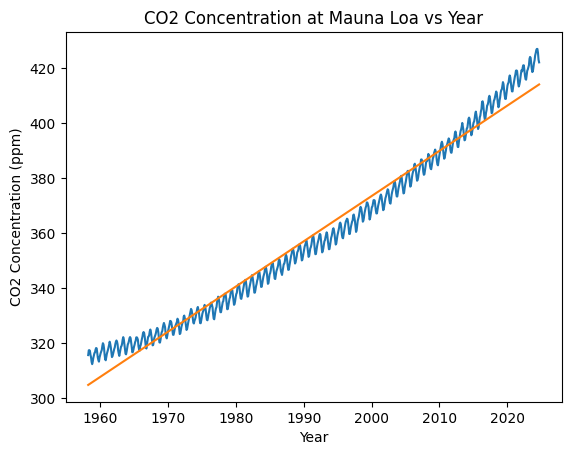

In [12]:
# Matrix Setup
A_matrix = np.empty((len(year), 2))
b_matrix = np.empty(len(co2))
for i in range(len(A_matrix)):
    A_matrix[i][0] = year[i]
    A_matrix[i][1] = 1

for i in range(len(b_matrix)):
    b_matrix[i] = co2[i]

# Solving for m and b
M, B = leastsquares(A_matrix, b_matrix)[0], leastsquares(A_matrix, b_matrix)[1]

# Graphing the values
year = data[:,0]
co2 = data[:,1]
xvals = np.linspace(year[0], year[-1], 1000)
yvals = xvals*M + B

plt.plot(year, co2)
plt.plot(xvals, yvals)
plt.xlabel("Year")
plt.ylabel("CO2 Concentration (ppm)")
plt.title("CO2 Concentration at Mauna Loa vs Year")
#plt.savefig("co2_chart.pdf")
plt.show()

### Quadratic Fit

$$A = \begin{bmatrix}
x_{1}^{2} & x_{1} & 1 \\
x_{2}^{2} & x_{2} & 1 \\
\vdots & \vdots & \vdots \\
\end{bmatrix}\hspace{1cm} b= \begin{bmatrix}
y_{1} \\
y_{2} \\
\vdots
\end{bmatrix}$$
After solving the normal equations, you recieve 3 fit values, which will be $m_{2}$, $m_{1}$ and $b_{0}$ in the equation:
$$y = m_{1}x^{2} + m_{2}x+ b_{0}$$

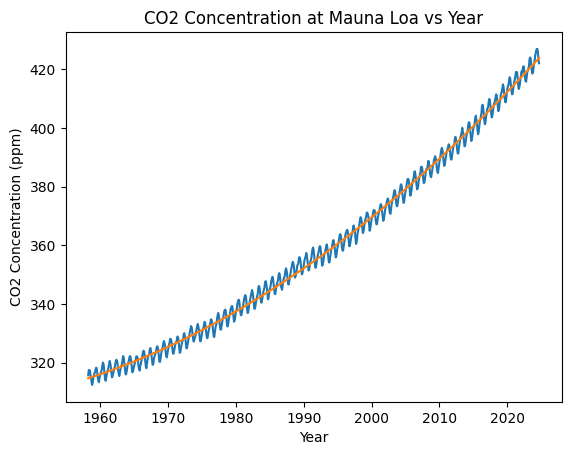

In [14]:
# Creation of Matrices
A_matrix_quadratic = np.empty((len(year), 3))
for i in range(len(A_matrix_quadratic)):
    A_matrix_quadratic[i][0] = year[i]**2
    A_matrix_quadratic[i][1] = year[i]
    A_matrix_quadratic[i][2] = 1

for i in range(len(b_matrix)):
    b_matrix[i] = co2[i]

# Finding parameters
M1, M2, B1 = leastsquares(A_matrix_quadratic, b_matrix)[0], leastsquares(A_matrix_quadratic, b_matrix)[1], leastsquares(A_matrix_quadratic, b_matrix)[2]

# Plotting
year = data[:,0]
co2 = data[:,1]
xvals = np.linspace(year[0], year[-1], 1000)
yvals = M1*xvals**2 + M2*xvals + B1

plt.plot(year, co2)
plt.plot(xvals, yvals)
plt.xlabel("Year")
plt.ylabel("CO2 Concentration (ppm)")
plt.title("CO2 Concentration at Mauna Loa vs Year")
#plt.savefig("co2_chart.pdf")
plt.show()

### Oscillatory Fit

This is an oscillatory linear least squares fit, with

$$A = \begin{bmatrix}
\sin(2 \pi x_{1}) & \cos(2 \pi x_{1}) & x_{1}^{2} & x_{1} & 1 \\
\sin(2 \pi x_{2}) & \cos(2 \pi x_{2}) & x_{2}^{2} & x_{2} & 1 \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
\end{bmatrix} \hspace{1cm} b= \begin{bmatrix}
y_{1} \\
y_{2} \\
\vdots
\end{bmatrix}$$
After solving the normal equations, you recieve 3 fit values, which will be $m_{4}$, $m_{3}, m_{2}, m_{1}$ and $b_{0}$ in the equation:
$$y = m_{4} \sin(2 \pi x) + m_{3} \cos(2 \pi x) + m_{2}x^{2} + m_{1}x + b_{0}$$

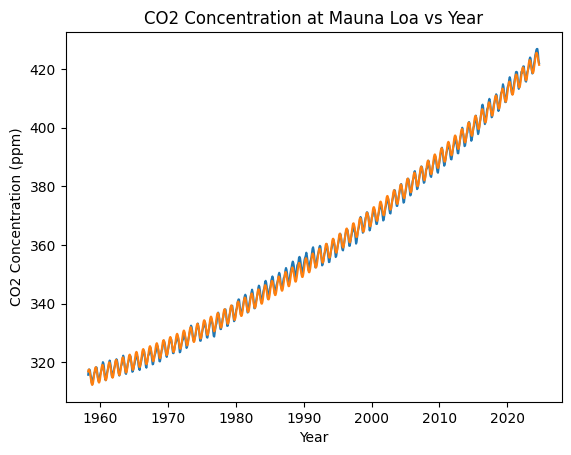

In [16]:
# Creation of Matrices
A_matrix_final = np.empty((len(year), 5))
b_matrix = np.empty(len(co2))
for i in range(len(A_matrix_final)):
    A_matrix_final[i][0] = np.sin(2*np.pi*year[i])
    A_matrix_final[i][1] = np.cos(2*np.pi*year[i])
    A_matrix_final[i][2] = year[i]**2
    A_matrix_final[i][3] = year[i]
    A_matrix_final[i][4] = 1

for i in range(len(b_matrix)):
    b_matrix[i] = co2[i]

# Putting all parameters in a matrix
MB = leastsquares(A_matrix_final, b_matrix)

# Plotting
year = data[:,0]
co2 = data[:,1]
xvals = np.linspace(year[0], year[-1], 1000)
yvals = MB[0]*np.sin(2*np.pi*xvals) + MB[1]*np.cos(2*np.pi*xvals) + MB[2]*(xvals**2) + MB[3]*xvals + MB[4]

plt.plot(year, co2)
plt.plot(xvals, yvals)
plt.xlabel("Year")
plt.ylabel("CO2 Concentration (ppm)")
plt.title("CO2 Concentration at Mauna Loa vs Year")
#plt.savefig("co2_chart.pdf")
plt.show()